In [2]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=641b13ccc2510d78a17bc8b68ae00deab293a6fca4059699c288aed7528f5b07
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   68

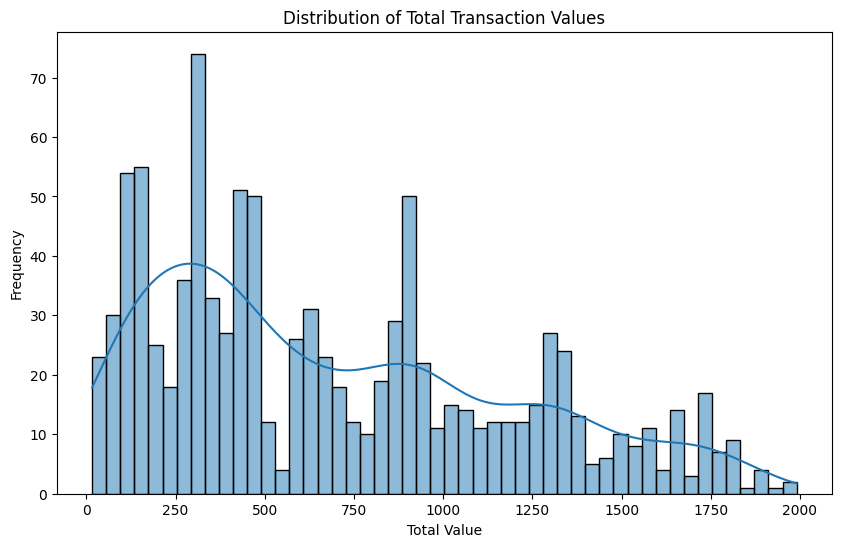

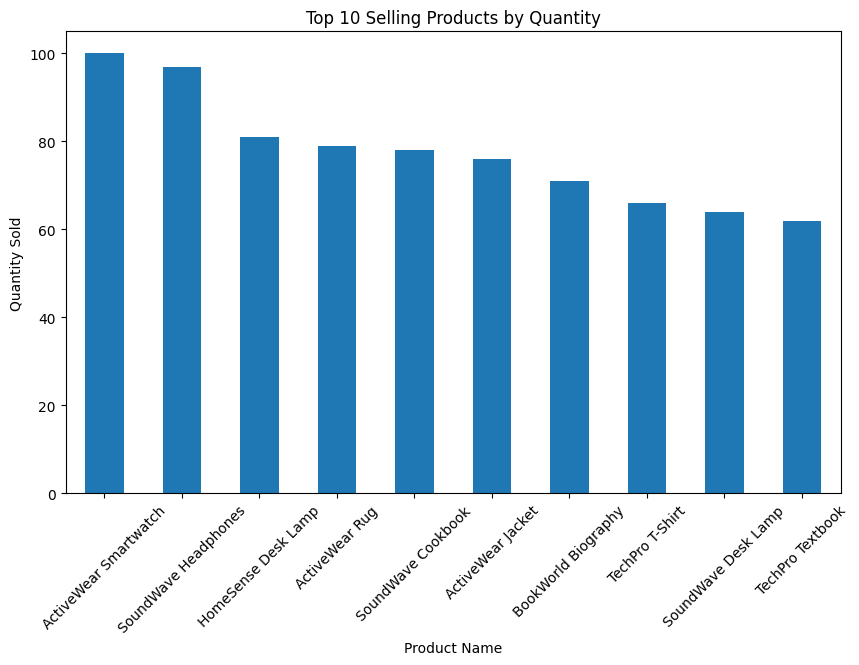

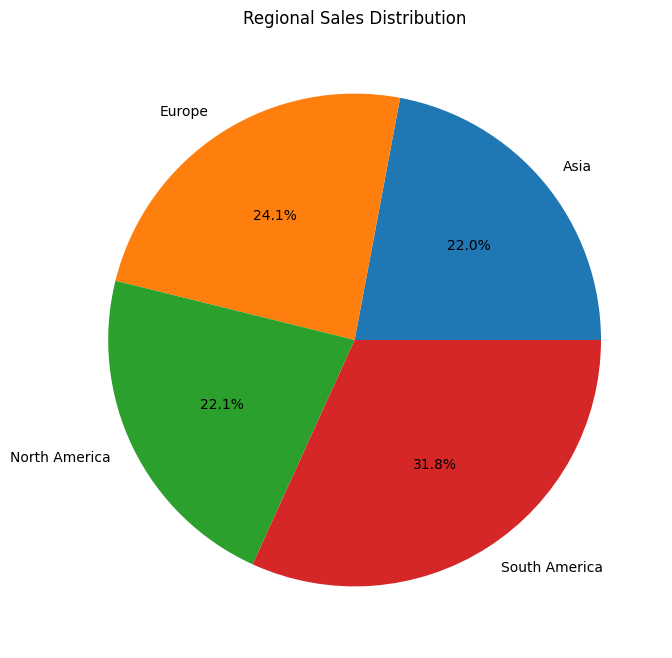

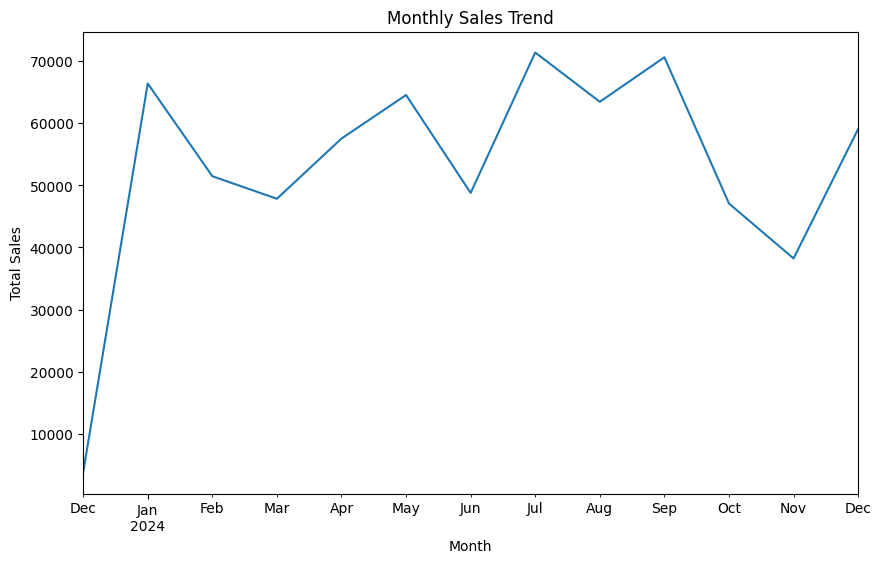

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
customers = pd.read_csv('https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE')
products = pd.read_csv('https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0')
transactions = pd.read_csv('https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF')

# Merge datasets
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')
all_data = pd.merge(customer_transactions, products, on='ProductID', how='left')

# Basic EDA
print(all_data.info())
print(all_data.describe())

# Check for missing values
print(all_data.isnull().sum())

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(all_data['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

# Top selling products
top_products = all_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Regional performance
regional_sales = all_data.groupby('Region')['TotalValue'].sum()
regional_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Regional Sales Distribution')
plt.ylabel('')
plt.show()

# Seasonality trends
all_data['TransactionDate'] = pd.to_datetime(all_data['TransactionDate'])
monthly_sales = all_data.set_index('TransactionDate').resample('ME')['TotalValue'].sum() # Changed 'M' to 'ME'
monthly_sales.plot(figsize=(10, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()
